# Q1.
$$\int_0^{\pi/2}sin(x)dx$$

## (b) $Integration$ using URN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

epoch = np.arange(1,1002,100)
z_list = []


for i, value in enumerate(epoch):
  y_list = []
  for _ in range(value):
    x = np.random.uniform(0,np.pi/2)
    y = np.sin(x)
    y_list.append(y)
  z = np.mean(y_list) * (np.pi/2)

  z_list.append(z)


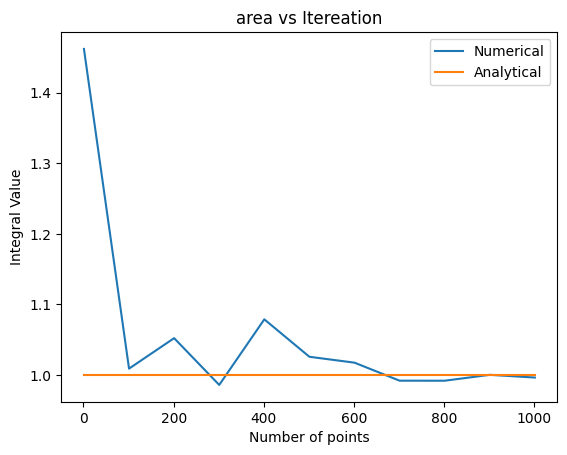

In [ ]:
plt.plot(epoch,z_list)
plt.plot(epoch,np.ones(len(epoch)))
plt.title("area vs Itereation")
plt.xlabel("Number of points")
plt.ylabel("Integral Value")
plt.legend(["Numerical","Analytical"])
plt.savefig("sin_norm.png")
plt.show()


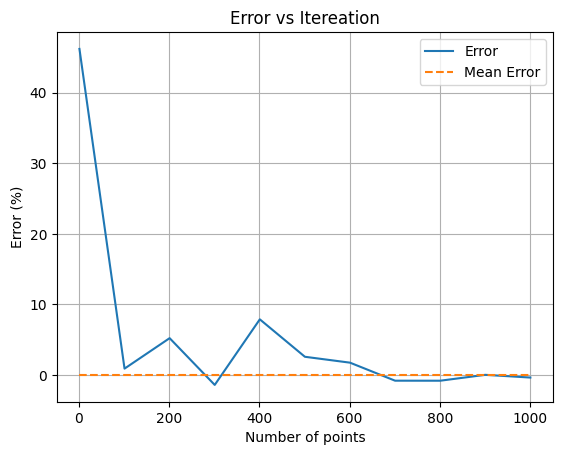

In [ ]:
error = z_list - np.ones(len(epoch))
error_mean = np.mean(error)

plt.plot(epoch, error*100,label ="Error")
plt.plot(epoch, np.ones(len(epoch))*error_mean, "--",label ="Mean Error")
plt.title("Error vs Itereation")
plt.xlabel("Number of points")
plt.ylabel("Error (%)")
plt.legend()
plt.grid(True)
plt.savefig("sin_norm_error.png")
plt.show()

## (c) Using Normalized probability distribution
$P(x) = 8x/\pi^{2}$<br><br>

CDF Equation: $ F(x) = \int_{0}^{x} P(x)dx =\frac{4x^2}{\pi^2}   $

Norm: $F(1) = 1$

$\implies F^{-1}(x) = \frac{ \pi}{2}\sqrt{y}$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

epoch = np.arange(1,1002,100)

z1_list = []

for i, value in enumerate(epoch):
  y1_list = []
  for _ in range(value):
    x = np.random.uniform(0,1)
    m = np.pi*np.sqrt(x)/2
    y = np.sin(m)/(8*m/(np.pi**2))

    y1_list.append(y)
  z1 = np.mean(y1_list)
  z1_list.append(z1)

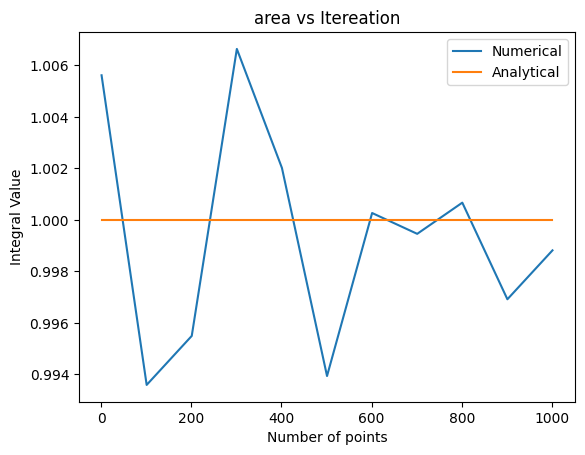

In [ ]:
plt.plot(epoch,z1_list)
plt.plot(epoch,np.ones(len(epoch)))
plt.title("area vs Itereation")
plt.xlabel("Number of points")
plt.ylabel("Integral Value")
plt.legend(["Numerical","Analytical"])
plt.savefig("sin_importance.png")
plt.show()


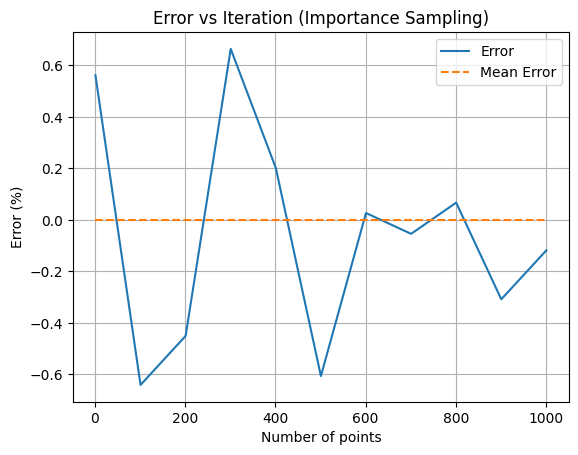

In [ ]:
error1 = z1_list - np.ones(len(epoch))
error1_mean = np.mean(error1)

plt.plot(epoch, error1 * 100, label = "Error")
plt.plot(epoch, np.ones(len(epoch))*error1_mean, "--", label ="Mean Error")
plt.title("Error vs Iteration (Importance Sampling)")
plt.xlabel("Number of points")
plt.ylabel("Error (%)")
plt.legend()
plt.grid(True)
plt.savefig("sin_importance_error.png")
plt.show()

## (d) Comparing URN Sampling and Importance sampling

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

epoch = np.arange(1,1002,100)

match_list_1 = []
n1_list = []

for i, value in enumerate(epoch):
  important_list = []
  normal_list = []
  for _ in range(value):
    x = np.random.uniform(0,1)
    normal = np.sin(x*(np.pi/2)) * (np.pi/2)

    m = np.pi*np.sqrt(x)/2
    y = np.sin(m)/(8*m/(np.pi**2))

    normal_list.append(normal)
    important_list.append(y)

  important_1 = np.mean(important_list)
  match_list_1.append(important_1)

  normal = np.mean(normal_list)
  n1_list.append(normal)

<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-1840214658.py:3: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(epoch,match_list_1, label = 'Important P(x) = $8x/\pi^{2}$')


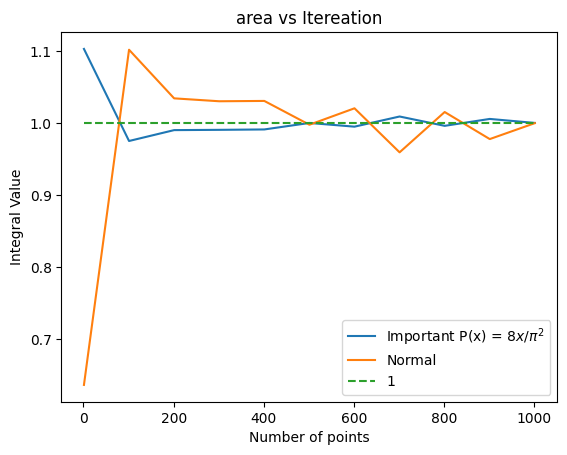

In [ ]:
epoch = np.arange(1,1002,100)

plt.plot(epoch,match_list_1, label = 'Important P(x) = $8x/\pi^{2}$')
plt.plot(epoch, n1_list, label = 'Normal')
plt.plot(epoch,np.ones(len(epoch)),'--', label = '1')
plt.title("area vs Itereation")
plt.xlabel("Number of points")
plt.ylabel("Integral Value")
plt.legend()
plt.savefig("comparison1.png")
plt.show()


## (d) Report
  - Trial Number
  - $I_{uniform}$
  - error % in $I_{uniform}$
  - $I_{importance}$
  - error % in $I_{inportance}$

In [ ]:
import pandas as pd

val = 1

error_match1 = ((np.array(match_list_1) - val) / val) * 100

error_normal_q1 = ((np.array(n1_list) - val) / val) * 100

df_q1_comparison = pd.DataFrame({
    'Points': epoch,
    'Importance Sampling Estimate': match_list_1,
    'Importance Sampling Error (%)': error_match1,
    'URN Sampling Estimate': n1_list,
    'URN Sampling Error (%)': error_normal_q1
})

display(df_q1_comparison)

,Points,Importance Sampling Estimate,Importance Sampling Error (%),URN Sampling Estimate,URN Sampling Error (%)
0,1,1.103393,10.339347,0.636043,-36.395656
1,101,0.975335,-2.466524,1.102262,10.226235
2,201,0.990457,-0.954285,1.034637,3.463749
3,301,0.990847,-0.915327,1.030596,3.059568
4,401,0.991386,-0.861392,1.031051,3.105137
5,501,1.000401,0.040104,0.997947,-0.205293
6,601,0.995263,-0.473669,1.020804,2.080448
7,701,1.009393,0.939329,0.959557,-4.044339
8,801,0.996408,-0.359173,1.015619,1.561878
9,901,1.006013,0.601284,0.977994,-2.200580


In [ ]:
# Export the DataFrame to a CSV file
df_q1_comparison.to_csv('q1_comparison.csv', index=False)

## (e) Plot `I_{uniform} & I_{importance} error` with steps

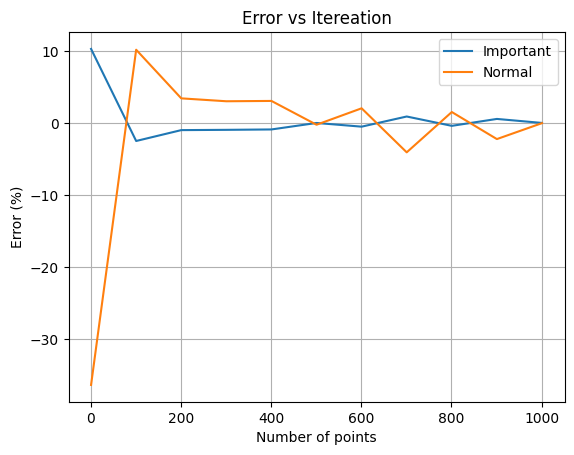

In [ ]:
plt.plot(epoch, error_match1, label = 'Important')
plt.plot(epoch, error_normal_q1, label = 'Normal')
plt.title("Error vs Itereation")
plt.xlabel("Number of points")
plt.ylabel("Error (%)")
plt.legend()
plt.savefig("error_q1")
plt.grid(True)

# Q2.
$I = \int_{0}^{1} exp(-x)dx $


Using URN


CDF:

## (b) Using URN $I_{uniform}$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

epoch = np.arange(1,1002,100)

z2_list = []

for i, value in enumerate(epoch):
  y2_list = []
  for _ in range(value):
    x = np.random.uniform(0,1)
    y = np.exp(-x)

    y2_list.append(y)
  z2 = np.mean(y2_list)
  z2_list.append(z2)

In [ ]:
z2_list

[np.float64(0.4529007659235287),
 np.float64(0.6459799788277852),
 np.float64(0.6358535719593102),
 np.float64(0.6182644998927477),
 np.float64(0.6247474815893526),
 np.float64(0.6306753364039596),
 np.float64(0.6184047560983684),
 np.float64(0.6104471697617925),
 np.float64(0.6290013773703804),
 np.float64(0.6315268663893417),
 np.float64(0.6338288425893523)]

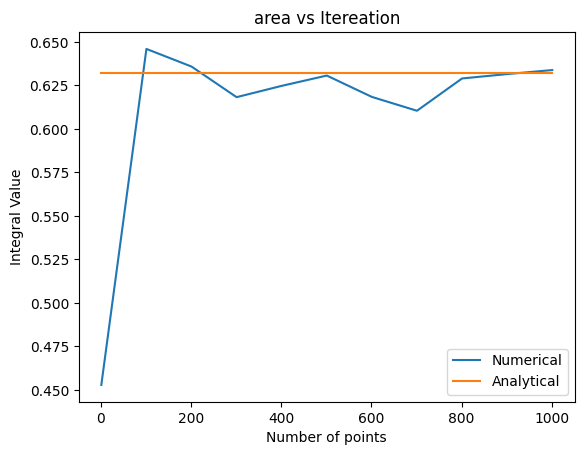

In [ ]:
plt.plot(epoch, z2_list)
plt.plot(epoch, np.ones(len(epoch))*(1-np.exp(-1)))
plt.title("area vs Itereation")
plt.xlabel("Number of points")
plt.ylabel("Integral Value")
plt.legend(["Numerical","Analytical"])
plt.savefig("exp_norm.png")
plt.show()

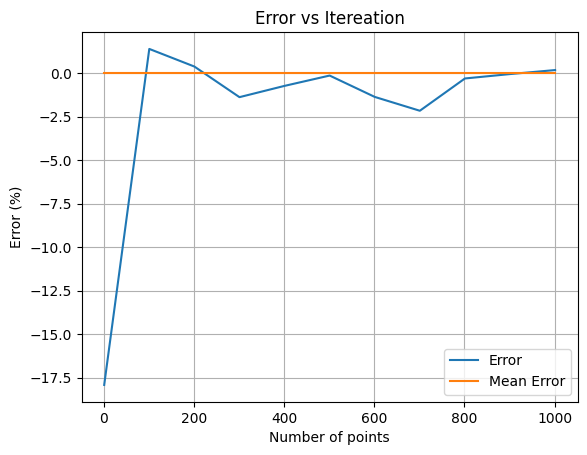

In [ ]:
error2 = z2_list - np.ones(len(epoch))*(1 - np.exp(-1))
error_mean2 = np.mean(error2)

plt.plot(epoch, error2*100)
plt.plot(epoch, np.ones(len(epoch))*error_mean2)
plt.title("Error vs Itereation")
plt.xlabel("Number of points")
plt.ylabel("Error (%)")
plt.grid(True)
plt.legend(["Error","Mean Error"])
plt.savefig("exp_norm_error.png")
plt.show()

## (c) Using P(x) = 1-x
Norm: $\int_{0}^{1}(1-x)dx = [x- \frac{x^2}{2}]_{0}^{1} = 1/2$


CDF: $G(x) = 2*F(x) = 2x- x^2 $


QE: $x^2-2x+y = 0$


$\implies G^{-1}(x) = 1 - \sqrt{1 - y}$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

epoch = np.arange(1,1002,100)

z3_list = []

for i, value in enumerate(epoch):
  y3_list = []
  for _ in range(value):
    x = np.random.uniform(0,1)
    m = 1 - np.sqrt(1 - x)
    y = np.exp(-m) / (2*(1-m))

    y3_list.append(y)
  z3 = np.mean(y3_list)
  z3_list.append(z3)

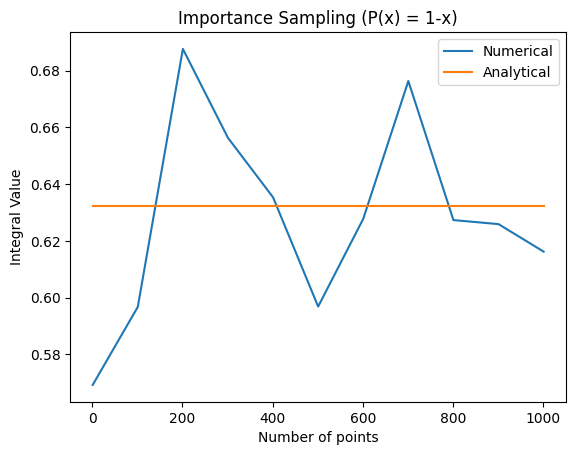

In [ ]:
plt.plot(epoch, z3_list, label = 'Numerical')
plt.plot(epoch, np.ones(len(epoch))*(1-np.exp(-1)), label= 'Analytical')
plt.title('Importance Sampling (P(x) = 1-x)')
plt.xlabel("Number of points")
plt.ylabel("Integral Value")
plt.legend()
plt.savefig("exp_importance.png")
plt.show()

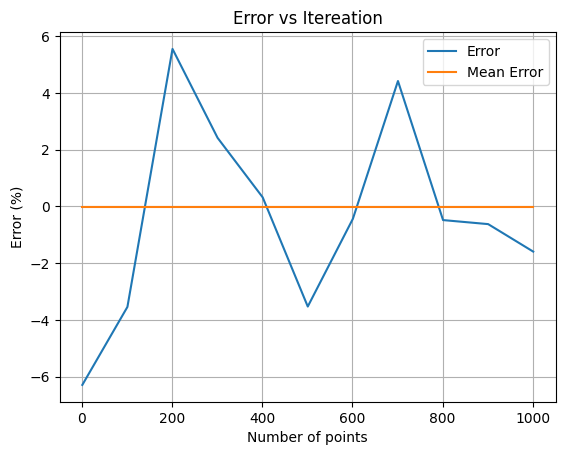

In [ ]:
error3 = z3_list - np.ones(len(epoch))*(1 - np.exp(-1))
error3_mean = np.mean(error3)

plt.plot(epoch, error3*100, label = 'Error')
plt.plot(epoch, np.ones(len(epoch))*error3_mean, label = 'Mean Error')
plt.title("Error vs Itereation")
plt.xlabel("Number of points")
plt.ylabel("Error (%)")
plt.legend()
plt.savefig("exp_importance_error.png")
plt.grid(True)

## (d) choosing new pdf

$(1+x)^{-1}$

Norm: $\int_{0}^{1} (1+x)^{-1}dx = \left[ln(1+x)\right]_{0}^{1} = ln2 $

CDF: $F(x) = \frac{1}{ln2} ln(1+x)$


$F^{-1}(x) = e^{yln2} - 1$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

epoch = np.arange(1,1002,100)

z4_list = []

for i, value in enumerate(epoch):
  y4_list = []
  for _ in range(value):
    x = np.random.uniform(0,1)
    m = np.exp(np.log(2)*x) - 1
    y = np.exp(-m) * (1 + m) * np.log(2)

    y4_list.append(y)
  z4 = np.mean(y4_list)
  z4_list.append(z4)

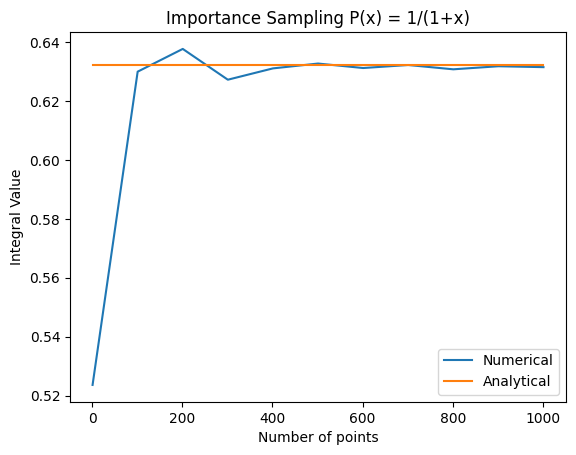

In [ ]:
plt.plot(epoch, z4_list, label = 'Numerical')
plt.plot(epoch, np.ones(len(epoch))*(1-np.exp(-1)), label= 'Analytical')
plt.title('Importance Sampling P(x) = 1/(1+x)')
plt.xlabel("Number of points")
plt.ylabel("Integral Value")
plt.legend()
plt.savefig("exp_importance2.png")
plt.show()

## (d) Compairing URN and Importance sampling in this case


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

epoch = np.arange(1,1002,100)

match_2 = []
match_3 = []
n2_list = []

for i, value in enumerate(epoch):
  normal_list_2 = []
  important_list_2 = []
  important_list_3 = []
  for _ in range(value):
    x = np.random.uniform(0,1)
    normal = np.exp(-x)

    m = 1 - np.sqrt(1 - x)
    y = np.exp(-m) / (2*(1-m))

    m1 = np.exp(np.log(2)*x) - 1
    y1 = np.exp(-m1) * (1 + m1) * np.log(2)

    normal_list_2.append(normal)
    important_list_2.append(y)
    important_list_3.append(y1)


  normal = np.mean(normal_list_2)
  n2_list.append(normal)

  important_2 = np.mean(important_list_2)
  match_2.append(important_2)

  important_3 = np.mean(important_list_3)
  match_3.append(important_3)

<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipython-input-454655211.py:4: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(epoch,np.ones(len(epoch))*(1-np.exp(-1)),'--', label = '$1-\exp(-x)$')


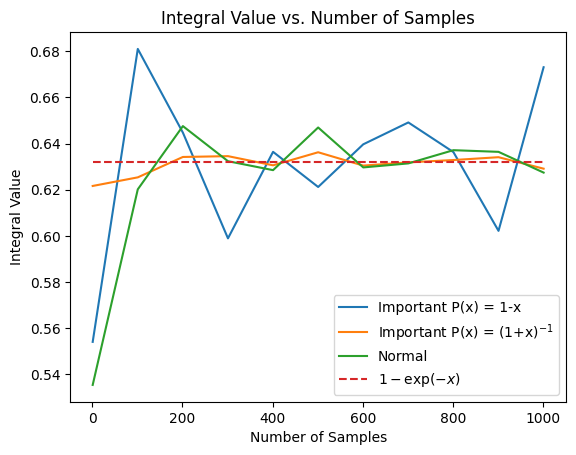

In [ ]:
plt.plot(epoch, match_2, label = 'Important P(x) = 1-x')
plt.plot(epoch, match_3, label = 'Important P(x) = (1+x)$^{-1}$')
plt.plot(epoch, n2_list, label = 'Normal')
plt.plot(epoch,np.ones(len(epoch))*(1-np.exp(-1)),'--', label = '$1-\exp(-x)$')
plt.title("Integral Value vs. Number of Samples")
plt.xlabel("Number of Samples")
plt.ylabel("Integral Value")
plt.legend()
plt.savefig("comparison2.png")
plt.show()

## (d) Report
  - Trial Number
  - $I_{uniform}$
  - error % in $I_{uniform}$
  - $I_{importance}$
  - error % in $I_{inportance}$

In [ ]:
import pandas as pd

value = 1-np.exp(-1)

error_match2 = ((np.array(match_2) - value) / value) * 100
error_match3 = ((np.array(match_3) - value) / value) * 100
error_normal_q2 = ((np.array(n2_list) - value) / value) * 100


df_q2_comparison = pd.DataFrame({
    'Number of Samples': epoch,
    'Importance Sampling Estimate P(x)=1-x': match_2,
    'Importance Sampling Error (%) P(x)=1-x': error_match2,
    'Importance Sampling Estimate P(x)=(1+x)^-1': match_3,
    'Importance Sampling Error (%) P(x)=(1+x)^-1': error_match3,
    'URN Sampling Estimate': n2_list,
    'URN Sampling Error (%)': error_normal_q2
})

display(df_q2_comparison)

,Number of Samples,Importance Sampling Estimate P(x)=1-x,Importance Sampling Error (%) P(x)=1-x,Importance Sampling Estimate P(x)=(1+x)^-1,Importance Sampling Error (%) P(x)=(1+x)^-1,URN Sampling Estimate,URN Sampling Error (%)
0,1,0.554054,-12.349888,0.621630,-1.659610,0.535399,-15.301193
1,101,0.681026,7.736740,0.625360,-1.069435,0.620176,-1.889525
2,201,0.644756,1.998851,0.634196,0.328384,0.647578,2.445369
3,301,0.598923,-5.251744,0.634554,0.384901,0.632366,0.038770
4,401,0.636419,0.680029,0.630582,-0.243407,0.628485,-0.575072
5,501,0.621188,-1.729443,0.636238,0.651432,0.646974,2.349790
6,601,0.639678,1.195550,0.630451,-0.264082,0.629667,-0.388100
7,701,0.649157,2.695107,0.631854,-0.042141,0.631407,-0.112822
8,801,0.636304,0.661872,0.632868,0.118169,0.637137,0.793631
9,901,0.602172,-4.737762,0.634097,0.312718,0.636418,0.679885


In [ ]:
df_q2_comparison.to_csv('q2_comparison.csv', index=False)

## (e) Plot

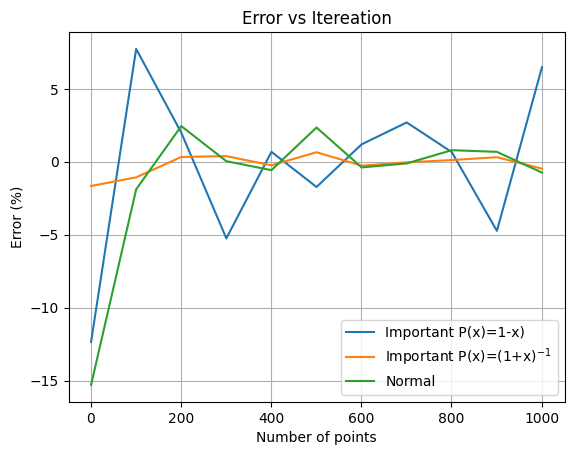

In [ ]:
plt.plot(epoch, error_match2, label = 'Important P(x)=1-x)')
plt.plot(epoch, error_match3, label = 'Important P(x)=(1+x)$^{-1}$')
plt.plot(epoch, error_normal_q2, label = 'Normal')
plt.title("Error vs Itereation")
plt.xlabel("Number of points")
plt.ylabel("Error (%)")
plt.legend()
plt.savefig("error_comp_2")
plt.grid(True)
plt.savefig("error_q2")
plt.show()

# Q3.
$$P(x) = \left(\frac{2\pi}{\sigma^2}\right)^{1/2} exp\left(\frac{-x^2}{2 \sigma^2}\right)$$
Taking $\sigma = 1$

/tmp/ipython-input-2183216989.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


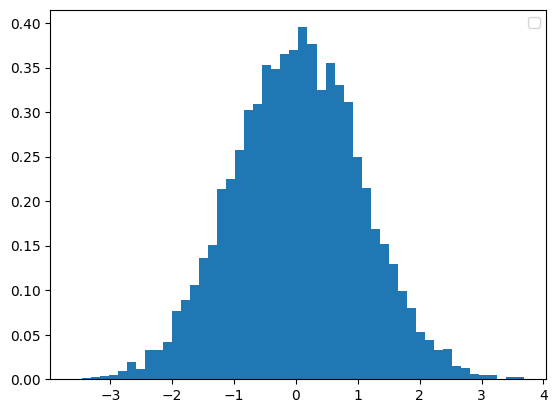

In [113]:
import numpy as np
import matplotlib.pyplot as plt

def p(x, sigma):
  return np.exp(-x**2/(2*sigma**2)) / (np.sqrt(2*np.pi)*sigma)

N = 10000
sigma = 1
x_old = 0
samples = []

for i in range(N):
  dx = np.random.uniform(-1, 1)
  x_new = x_old + dx

  acc_prob = min(1, p(x_new, sigma)/p(x_old, sigma))

  if np.random.rand() < acc_prob:
      x_old = x_new

  samples.append(x_old)

plt.hist(samples, bins=50, density=True)
plt.legend()
plt.savefig("q3_hist.png")
plt.show()
